In [69]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 

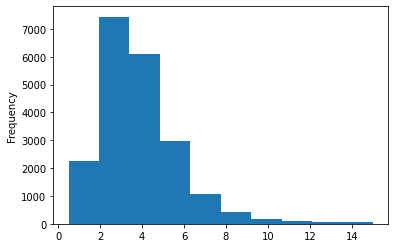

In [41]:
df['MedInc'].plot(kind='hist')

In [42]:
import numpy as np

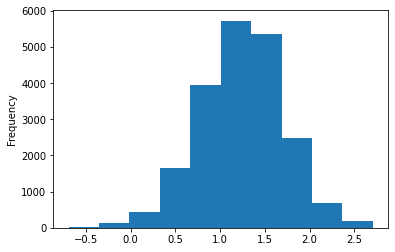

In [43]:
np.log(df['MedInc']).plot(kind='hist')

In [ ]:
# вычисление с пом-ю статистик

In [53]:
e = np.mean(df['MedInc']) #k*theta

In [55]:
d = np.std(df['MedInc']) ** 2 #k*theta^2

In [56]:
th = d/e

In [57]:
k = e/th

In [58]:
k, th

(4.15114461941045, 0.9324346313563849)

In [ ]:
# вычисление с пом-ю максимизации правдоподобия

In [70]:
def neg_log_likelihood(params, data):
    a, scale = params
    log_likelihood = np.sum(gamma.logpdf(data, a, loc=0, scale=scale))
    return -log_likelihood

In [71]:
# Initial guess for parameters (a, scale)
initial_guess = [1, 2]

# Perform the optimization
result = minimize(neg_log_likelihood, initial_guess, args=(df['MedInc'],), method='L-BFGS-B', bounds=[(1e-9, None), (1e-9, None)]) #Bounds added to ensure that a and scale are positive

In [72]:
result

      fun: 39616.89334012621
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00509317, 0.02692104])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 54
      nit: 14
     njev: 18
   status: 0
  success: True
        x: array([4.74906039, 0.81503951])

In [82]:
result.x

array([4.74906039, 0.81503951])

In [73]:
import sklearn

In [74]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 

In [75]:
from sklearn.neighbors import KernelDensity

In [76]:
med_inc = df['MedInc'].values.reshape(-1, 1)

In [77]:
kde = KernelDensity(kernel='linear', bandwidth=0.5)

In [62]:
kde = KernelDensity(bandwidth=0.5, kernel='linear').fit(np.array(df['MedInc']).reshape((-1, 1)))

In [78]:
kde.fit(med_inc)

KernelDensity(bandwidth=0.5, kernel='linear')

In [79]:
x = np.array([[6]])  # Reshape for sklearn
log_density = kde.score_samples(x)

In [80]:
density = np.exp(log_density)

In [81]:
density

array([0.07392297])

In [83]:
a = result.x[0]

In [84]:
scale = result.x[1]

In [85]:
a, scale

(4.749060389120825, 0.8150395075945511)

In [87]:
import matplotlib.pyplot as plt

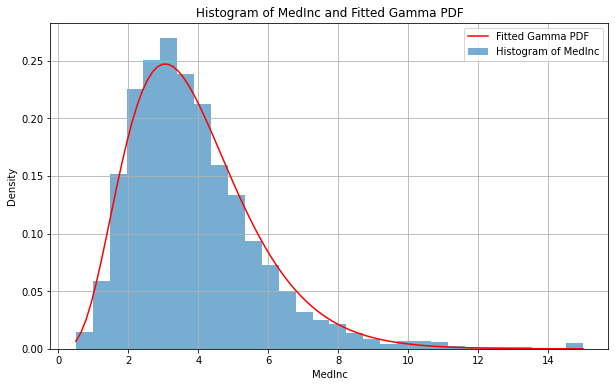

In [92]:
points = np.linspace(df['MedInc'].min(), df['MedInc'].max(), 100)
pdf = gamma.pdf(points, a, loc=0, scale=scale)

# Create the plot
plt.figure(figsize=(10, 6))
plt.hist(df['MedInc'], bins=30, density=True, alpha=0.6, label='Histogram of MedInc') #Added bins argument
plt.plot(points, pdf, 'r-', label='Fitted Gamma PDF')
plt.xlabel('MedInc')
plt.ylabel('Density')
plt.title('Histogram of MedInc and Fitted Gamma PDF')
plt.legend()
plt.grid(True)
plt.show()

In [94]:
for points_len in [100, 1000, 10000]:
    otstup = (df['MedInc'].max() - df['MedInc'].min()) / 100
    points = np.linspace(df['MedInc'].min() - otstup, df['MedInc'].max() + otstup, points_len + 2)
    
    pdf = gamma.pdf(points, a, loc=0, scale=scale)
    sum_ = 0
    for idx in range(1, len(points)):
        sum_ += pdf[idx] * (points[idx] - points[idx - 1])
    print(sum_)

0.9996041742445563
0.999776445941482
0.9997906750479274
